In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
df = pd.read_csv("data/Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
df['price_change'] = df['close'].shift(-1) - df['close']
df['target'] = (df['price_change'] > 0).astype(int)

df.dropna(inplace=True)

In [4]:
X = df[['open', 'high', 'low', 'volume']]
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6741949101435292
F1 Score: 0.6511552824442268
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     48931
           1       0.71      0.60      0.65     50561

    accuracy                           0.67     99492
   macro avg       0.68      0.68      0.67     99492
weighted avg       0.68      0.67      0.67     99492



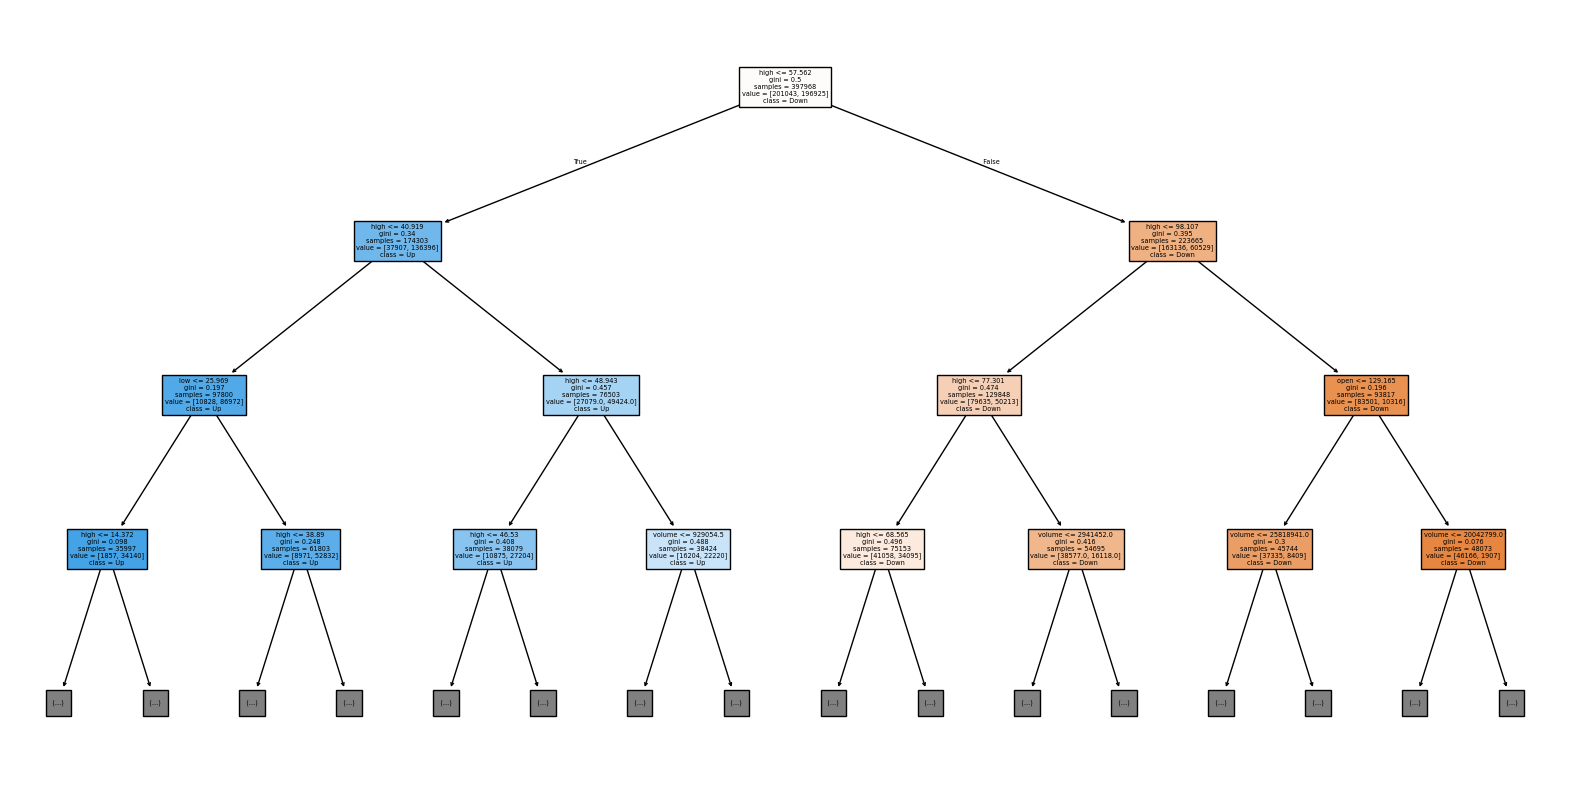

In [8]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Down', 'Up'],
    filled=True,
    max_depth=3
)
plt.show()

In [9]:
dt_pruned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50,
    random_state=42
)

dt_pruned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred_pruned = dt_pruned.predict(X_test)

print("Accuracy (Pruned):", accuracy_score(y_test, y_pred_pruned))
print("F1 Score (Pruned):", f1_score(y_test, y_pred_pruned))

Accuracy (Pruned): 0.7432657902142886
F1 Score (Pruned): 0.7244165848500869
